In [1]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch

Intro

In [3]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True) #bias

In [4]:
def forward(x):
  y = w * x + b
  return y

In [5]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

Torch Linear Model

In [6]:
# import torch
from torch.nn import Linear

In [7]:
torch.manual_seed(1) # setting seed per generare w e b casualmente
model = Linear(in_features=1, out_features=1) # 1 input 1 output
print(model.bias, model.weight) #stampa bias e weight

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor([ [2.0], [3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)

Custom Modules

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

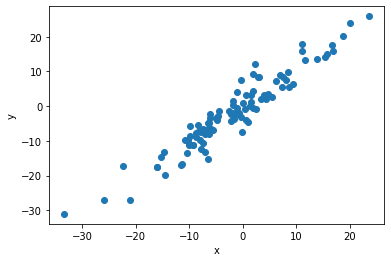

In [10]:
# Making a synthetic Dataset
# tensore con numeri casuali
torch.manual_seed(1) # settare un seed fisso
X = torch.randn(100, 1) * 10 # vettore di valori in una matrice  
y = X + 3 * torch.randn(100,1) # etichette random
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [11]:
class LR (nn.Module): # estendo nn.module
  def __init__(self, input_size, output_size): #overloading 
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x) # pred -> prediction
    return pred

In [12]:
torch.manual_seed(1)
model = LR(1,1)
# print(list(model.parameters()))
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [13]:
# x = torch.tensor([[1.0], [2.0]])
# model.forward(x)

In [14]:
[w, b] = model.parameters()
#print(w, b)
# wl = w[0][0].item( )
# bl = b[0].item()
# print(wl, bl)

def get_params():
  return (w[0][0].item(), b[0].item())

In [15]:
def plot_fit(title):
  plt.title = title
  wl, bl = get_params()
  x1 = np.array([-30, 30])
  y1 = wl*x1 + bl
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

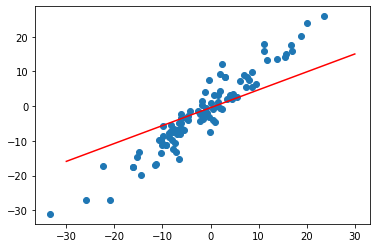

In [16]:
plot_fit('Initial model')

Implementing gradient descent

In [17]:
# Mean Square Loss
criterion = nn.MSELoss()
# stocastic gradient descent, riduce la perdita un sample alla volta
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss.item())

  # aggiunta detach per evitare bug nella visualizzazione
  losses.append(loss.detach().numpy()) # make a list of losses
  # set the gradient to zero beacause gradinets accumulate following 
  # the last backward call
  optimizer.zero_grad()
  # we take the the gradient of the loss function (deriavte)
  loss.backward()
  # update the parameters with the optimizer with the gradient computerd before
  # we use this optimization algorithm (in this case Stochastic Gradient Descent)
  # to update model weights in the direction of the least error.
  # By minimizing the error function of our model as we attempt to minimize the
  # loss iteratively to obtain a model with optimal parameters, the model that
  # best fit the data.
  optimizer.step()

epoch:  0 loss:  10.330840110778809
epoch:  1 loss:  10.315887451171875
epoch:  2 loss:  10.3015718460083
epoch:  3 loss:  10.287869453430176
epoch:  4 loss:  10.274754524230957
epoch:  5 loss:  10.262201309204102
epoch:  6 loss:  10.250182151794434
epoch:  7 loss:  10.238677024841309
epoch:  8 loss:  10.227664947509766
epoch:  9 loss:  10.21712589263916
epoch:  10 loss:  10.207035064697266
epoch:  11 loss:  10.197376251220703
epoch:  12 loss:  10.188131332397461
epoch:  13 loss:  10.179282188415527
epoch:  14 loss:  10.170811653137207
epoch:  15 loss:  10.162701606750488
epoch:  16 loss:  10.154938697814941
epoch:  17 loss:  10.147509574890137
epoch:  18 loss:  10.140397071838379
epoch:  19 loss:  10.133588790893555
epoch:  20 loss:  10.127071380615234
epoch:  21 loss:  10.120833396911621
epoch:  22 loss:  10.114862442016602
epoch:  23 loss:  10.109146118164062
epoch:  24 loss:  10.103673934936523
epoch:  25 loss:  10.09843635559082
epoch:  26 loss:  10.093422889709473
epoch:  27 loss

Text(0.5, 0, 'epoch')

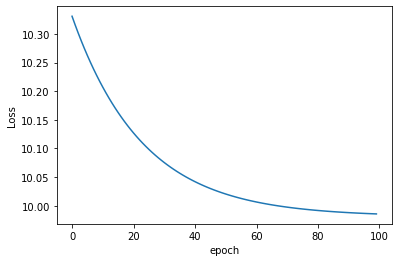

In [29]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

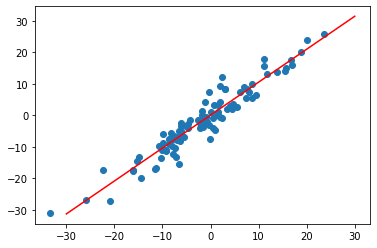

In [30]:
plot_fit("Trained Model")